In [2]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt


In [3]:
# Get original MediaPipe landmarks from an image
def getLandmarksfromImage(image):
    # Load MediaPipe Pose model
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()

    # Convert image to RGB (MediaPipe accepts RGB images)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform pose estimation
    results = pose.process(image_rgb)

    # Draw pose landmarks on the image
    if results.pose_landmarks:

        landmark_dict = {}

        for i, landmark in enumerate(results.pose_landmarks.landmark):
            landmark_name = mp_pose.PoseLandmark(i).name
            x = landmark.x
            y = landmark.y
            z = landmark.z  # Correctly assign the z value
            visibility = landmark.visibility

            # Add to landmark_dict
            landmark_dict[landmark_name] = (x, y, z, visibility)
            
    return landmark_dict


In [4]:
# Function to detect poses and draw them on the image
def detect_and_draw_pose(image, visibility_threshold=0.5):
    # Load MediaPipe Pose model
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()

    # Convert image to RGB (MediaPipe accepts RGB images)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform pose estimation
    results = pose.process(image_rgb)

    # Draw pose landmarks on the image
    if results.pose_landmarks:
        mp_drawing = mp.solutions.drawing_utils
        annotated_image = image.copy()
        
        landmark_dict = {}

        for i, landmark in enumerate(results.pose_landmarks.landmark):
            landmark_name = mp_pose.PoseLandmark(i).name
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            visibility = landmark.visibility

            # Add to landmark_dict
            landmark_dict[landmark_name] = (x, y, visibility)

            # Draw on image only if visibility is above the threshold
            if visibility > visibility_threshold:
                # Draw point
                cv2.circle(annotated_image, (x, y), 5, (0, 255, 0), -1)

        # Draw connections
        for connection in mp_pose.POSE_CONNECTIONS:
            start_idx = connection[0]
            end_idx = connection[1]
            if results.pose_landmarks.landmark[start_idx].visibility > visibility_threshold and results.pose_landmarks.landmark[end_idx].visibility > visibility_threshold:
                start_point = (int(results.pose_landmarks.landmark[start_idx].x * image.shape[1]), 
                               int(results.pose_landmarks.landmark[start_idx].y * image.shape[0]))
                end_point = (int(results.pose_landmarks.landmark[end_idx].x * image.shape[1]), 
                             int(results.pose_landmarks.landmark[end_idx].y * image.shape[0]))
                cv2.line(annotated_image, start_point, end_point, (0, 255, 0), 2)

        return annotated_image, landmark_dict
    else:
        return image, None


In [5]:
# Load an example image
#image_path = 'generated.jpg'
image_path = 'my_pose.jpg'
image = cv2.imread(image_path)


In [6]:
# Detect and draw pose on the image
annotated_image, pose_landmarks_dict = detect_and_draw_pose(
    image, visibility_threshold=0.6)

C:\Users\mshos\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [7]:
# Print pose landmarks with labels
if pose_landmarks_dict:
    for name, (x, y, visibility) in pose_landmarks_dict.items():
        print(f'{name}: ({x}, {y}), visibility: {visibility:.2f}')

NOSE: (1847, 961), visibility: 1.00
LEFT_EYE_INNER: (1879, 895), visibility: 1.00
LEFT_EYE: (1899, 892), visibility: 1.00
LEFT_EYE_OUTER: (1913, 890), visibility: 1.00
RIGHT_EYE_INNER: (1805, 900), visibility: 1.00
RIGHT_EYE: (1780, 900), visibility: 1.00
RIGHT_EYE_OUTER: (1756, 902), visibility: 1.00
LEFT_EAR: (1946, 911), visibility: 1.00
RIGHT_EAR: (1724, 932), visibility: 1.00
MOUTH_LEFT: (1895, 1021), visibility: 1.00
MOUTH_RIGHT: (1806, 1028), visibility: 1.00
LEFT_SHOULDER: (2120, 1215), visibility: 1.00
RIGHT_SHOULDER: (1566, 1241), visibility: 1.00
LEFT_ELBOW: (2290, 1480), visibility: 0.96
RIGHT_ELBOW: (1281, 1332), visibility: 0.99
LEFT_WRIST: (2516, 1661), visibility: 0.98
RIGHT_WRIST: (903, 1173), visibility: 0.99
LEFT_PINKY: (2606, 1660), visibility: 0.97
RIGHT_PINKY: (780, 1082), visibility: 0.98
LEFT_INDEX: (2598, 1653), visibility: 0.97
RIGHT_INDEX: (804, 1047), visibility: 0.98
LEFT_THUMB: (2555, 1665), visibility: 0.98
RIGHT_THUMB: (856, 1085), visibility: 0.98
LEFT_

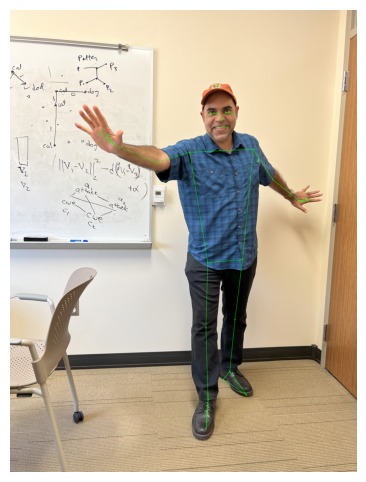

In [8]:
# Display using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [9]:
# Save the annotated image to a file
output_path = image_path+'_annotated_image.jpg'
cv2.imwrite(output_path, annotated_image)


True

In [10]:
getLandmarksfromImage(image)

{'NOSE': (0.610871434211731,
  0.23851224780082703,
  -0.36311075091362,
  0.999929666519165),
 'LEFT_EYE_INNER': (0.6213750839233398,
  0.22199493646621704,
  -0.33814170956611633,
  0.99982088804245),
 'LEFT_EYE': (0.6280248761177063,
  0.22138750553131104,
  -0.33824196457862854,
  0.9997774958610535),
 'LEFT_EYE_OUTER': (0.632688581943512,
  0.22090670466423035,
  -0.33829301595687866,
  0.9997954964637756),
 'RIGHT_EYE_INNER': (0.5970739722251892,
  0.22325655817985535,
  -0.34021827578544617,
  0.9998196959495544),
 'RIGHT_EYE': (0.5887487530708313,
  0.2232825756072998,
  -0.34023910760879517,
  0.9997507929801941),
 'RIGHT_EYE_OUTER': (0.5808993577957153,
  0.22373774647712708,
  -0.3401578962802887,
  0.9997485280036926),
 'LEFT_EAR': (0.6435389518737793,
  0.2261376529932022,
  -0.152809277176857,
  0.9997422099113464),
 'RIGHT_EAR': (0.5701869130134583,
  0.23124149441719055,
  -0.16451211273670197,
  0.999599039554596),
 'MOUTH_LEFT': (0.626708984375,
  0.25346243381500244,